# Data Processing

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

df = pd.read_csv("data/heart_disease_health_indicators_BRFSS2015.csv")


### construct Y column

In [350]:
df['Diabetes'] = df['Diabetes'].replace(2, 1)
df['Y'] = df['HeartDiseaseorAttack'].astype(int).astype(str) + ',' + df['Diabetes'].astype(int).astype(str) + ',' + df['Stroke'].astype(int).astype(str)

In [351]:
print("Dimensions of the dataset : ", df.shape)
df['Y'].value_counts()

Dimensions of the dataset :  (253680, 23)


Y
0,0,0    193793
0,1,0     29639
1,0,0     13151
1,1,0      6805
0,0,1      4559
1,0,1      2200
0,1,1      1796
1,1,1      1737
Name: count, dtype: int64

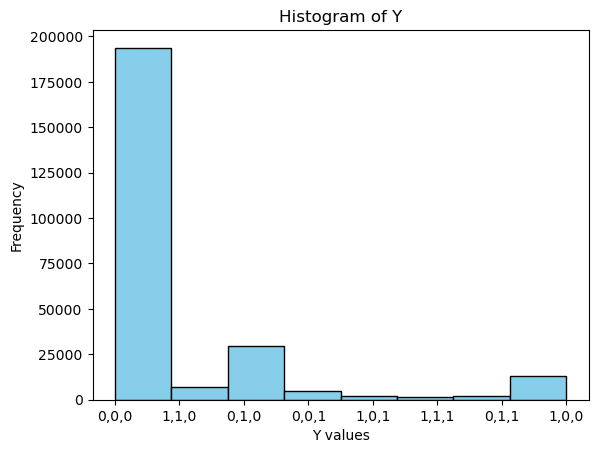

In [352]:
plt.hist(df['Y'], bins=8, color='skyblue', edgecolor='black')
plt.title('Histogram of Y')
plt.xlabel('Y values')
plt.ylabel('Frequency')
plt.show()

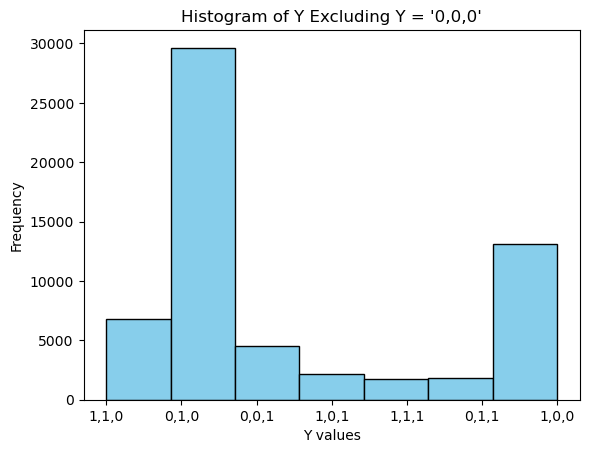

In [353]:
df_no000 = df[df['Y'] != '0,0,0']
plt.hist(df_no000['Y'], bins=7, color='skyblue', edgecolor='black')
plt.title('Histogram of Y Excluding Y = \'0,0,0\'')
plt.xlabel('Y values')
plt.ylabel('Frequency')
plt.show()

In [354]:
df['Age'].unique()

array([ 9.,  7., 11., 10.,  8., 13.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

### create `Age_Groups` column

In [355]:
def create_age_groups(age):
    if age in [1, 2, 3]:
        return 'Age(18~34)'
    elif age in [4, 5, 6]:
        return 'Age(35~49)'
    elif age in [7, 8, 9]:
        return 'Age(50~64)'
    elif age in [10, 11, 12]:
        return 'Age(65~79)'
    elif age in [13]:
        return 'Age(>=80)'
    else:
        print('Unknown value')


df['Age_5Groups'] = df['Age'].apply(create_age_groups)



In [373]:
def create_age_groups_2(age):
    if age in [1, 2]:
        return 'Young Adult(18~29)'
    elif age in [3, 4, 5]:
        return 'Middle Age(30~44)'
    elif age in [6, 7, 8, 9]:
        return 'Senior Adult(45~64)'
    elif age in [10, 11, 12, 13]:
        return 'Senior Citizens(65+)'
    else:
        print('Unknown value')


df['Age_Groups'] = df['Age'].apply(create_age_groups_2)



In [357]:
df['Age_Groups'].value_counts()

Age_Groups
Senior Adult(45~64)     110209
Senior Citizens(65+)     89070
Middle Age(30~44)        41103
Young Adult(18~29)       13298
Name: count, dtype: int64

In [375]:
def create_bmi_groups(bmi):
    if bmi in range(12, 19):
        return 'Underweight: <= 18'
    elif bmi in range(19, 25):
        return 'Healthy weight: 19-24'
    elif bmi in range(25, 30):
        return 'Overweight: 25-29'
    elif bmi >= 30:
        return 'Obesity: >= 30'
    else:
        print('Unknown value')


df['BMI_Groups'] = df['BMI'].apply(create_bmi_groups)



In [377]:
df['BMI_Groups'].value_counts()

BMI_Groups
Overweight: 25-29        93749
Obesity: >= 30           87851
Healthy weight: 19-24    68953
Underweight: <= 18        3127
Name: count, dtype: int64

In [359]:
# def one_hist(column_name):
#     group_counts = df[column_name].value_counts()

#     # index gives the name of the class
#     labels, counts = zip(*sorted(zip(group_counts.index, group_counts)))

#     plt.hist(df[column_name], bins=np.arange(len(labels)+1)-0.5, color='skyblue', edgecolor='black')

#     plt.xticks(range(len(labels)), labels, rotation=45)

#     plt.xlabel(column_name)
#     plt.ylabel('Frequency')

#     plt.show()


# Stacked Histograms

In [360]:
def stacked_hist(df, x_var, stack_var, drop_Y000=False):
    '''
    Draws a stacked histogram for the specified variables in the dataframe.
    @df:            dataframe
    @x_var:         name of the feature on the x-axis
    @stack_var:     name of feature used to stack the histogram
    @drop_Y000:     drop the datapoints with Y = '0,0,0' 
    '''
    df_copy = df.copy()
    if drop_Y000:
        df_copy = df_copy[df_copy['Y'] != '0,0,0']
        
    stacked_data = df_copy.groupby([x_var, stack_var]).size().unstack()
    
    num_stacks = stacked_data.shape[1]
    colors = plt.cm.tab10.colors[:num_stacks]
    stacked_data.plot(kind='bar', stacked=True, color=colors, edgecolor='black')
    
    plt.xlabel(x_var)
    plt.ylabel('Frequency')
    plt.title('Stacked Histogram of ' + x_var + ' by ' + stack_var)
    plt.xticks(rotation=45)
    plt.show()



Example where we drop the datapoint with Y = 000

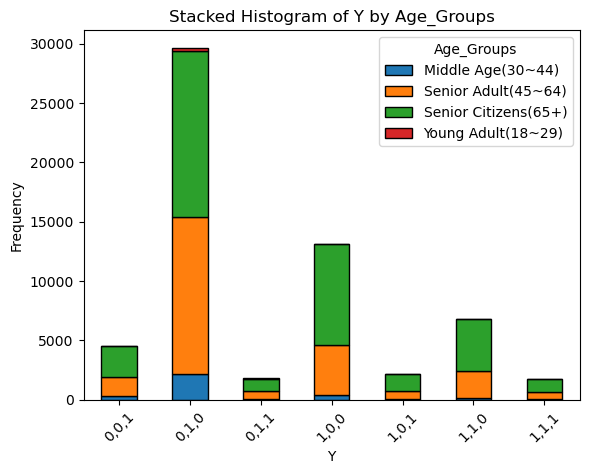

In [361]:
stacked_hist(df, 'Y', 'Age_Groups', True)

Example for the function where we want to get the histogram with respect to `Y` and use `DiffWalk` to stack

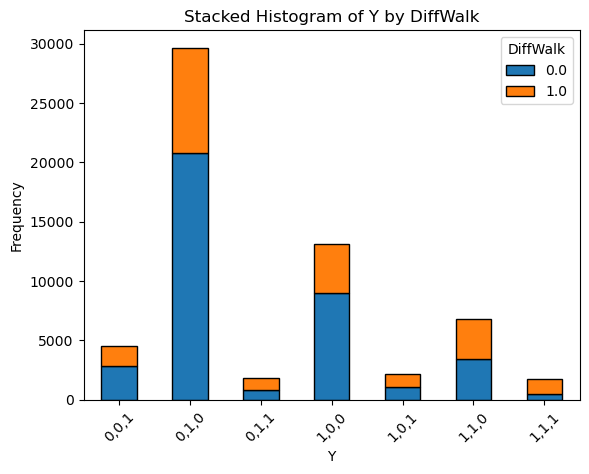

In [362]:
stacked_hist(df, 'Y', 'DiffWalk', drop_Y000=True)

## Histograms for each variable stacked on Age groups

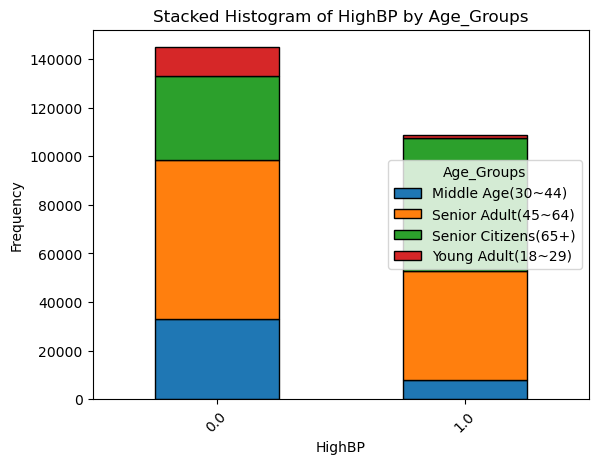

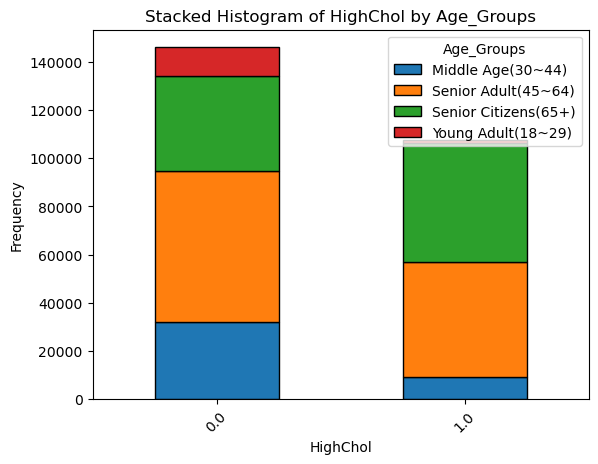

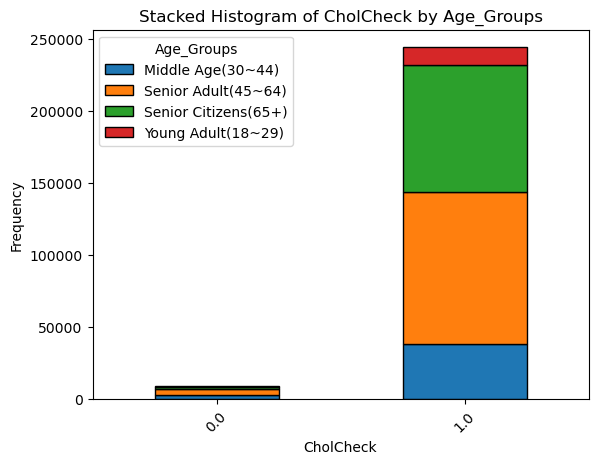

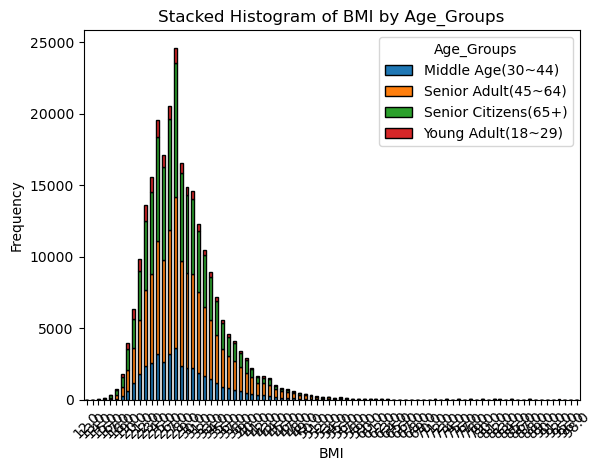

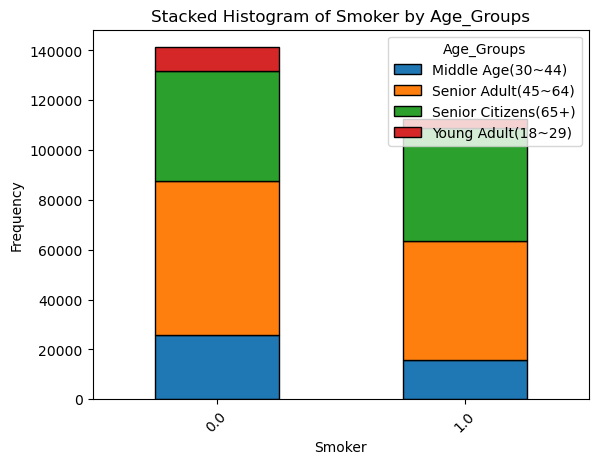

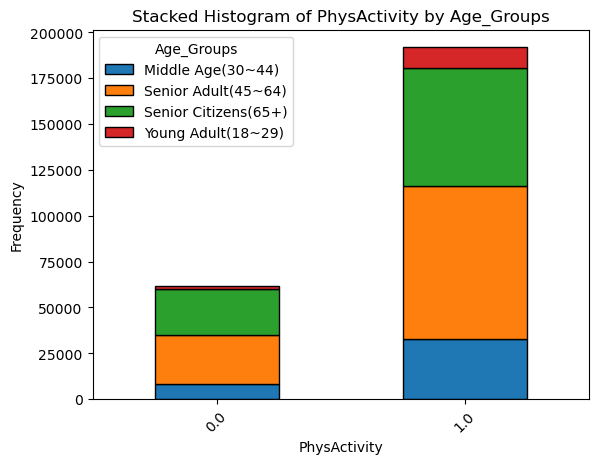

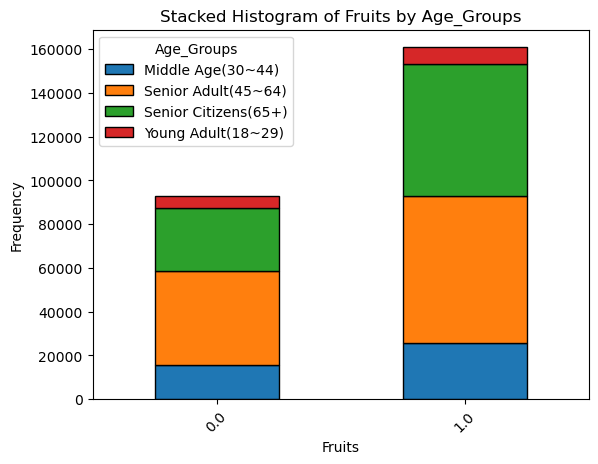

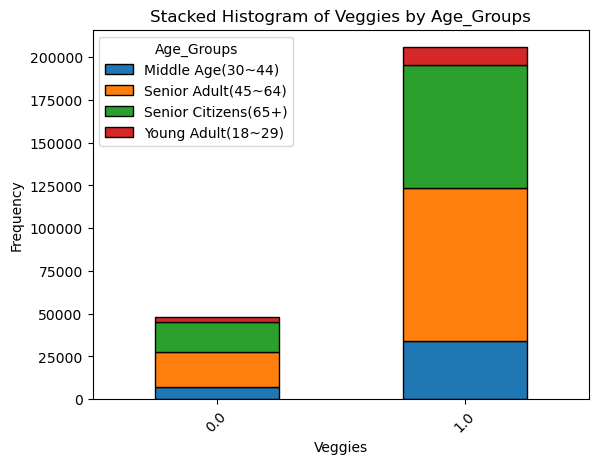

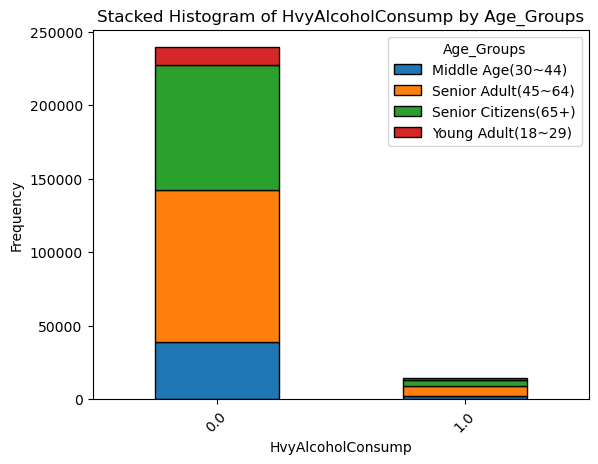

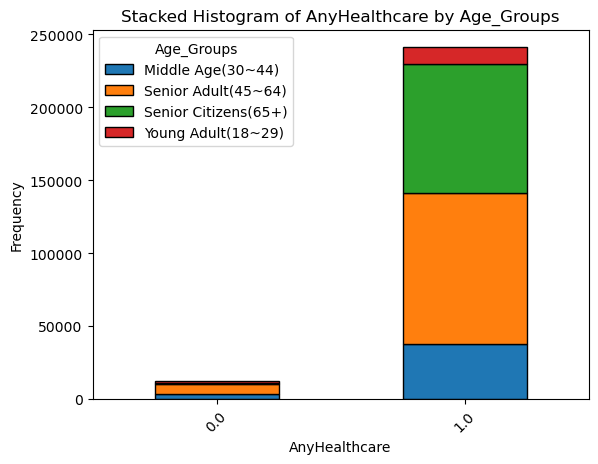

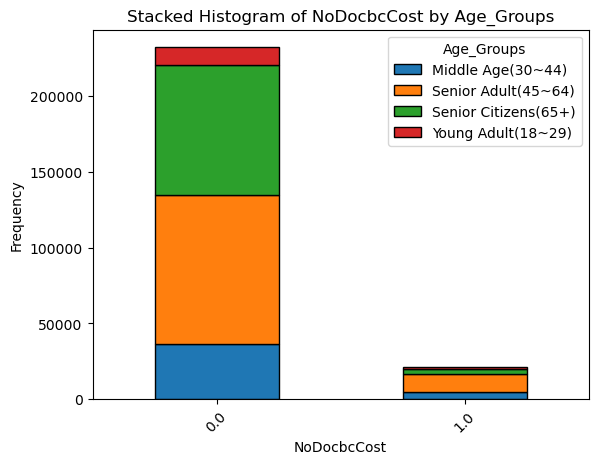

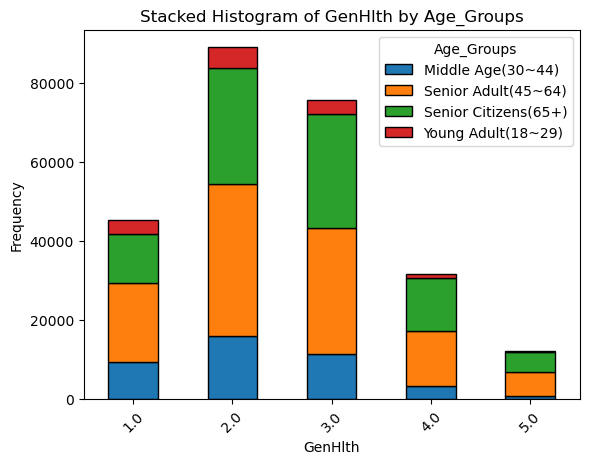

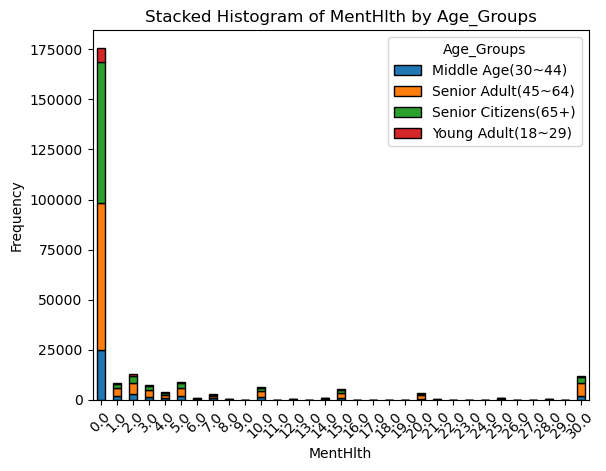

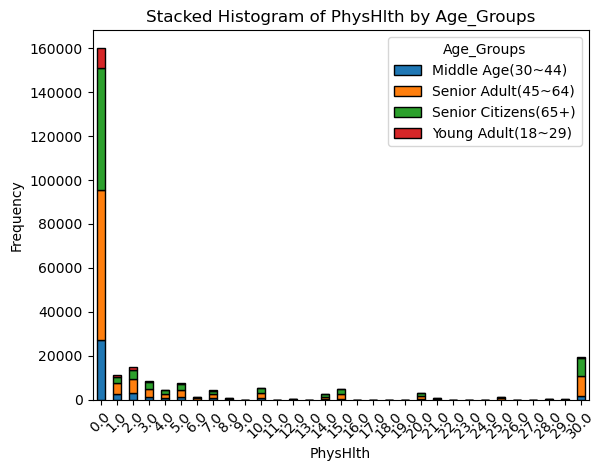

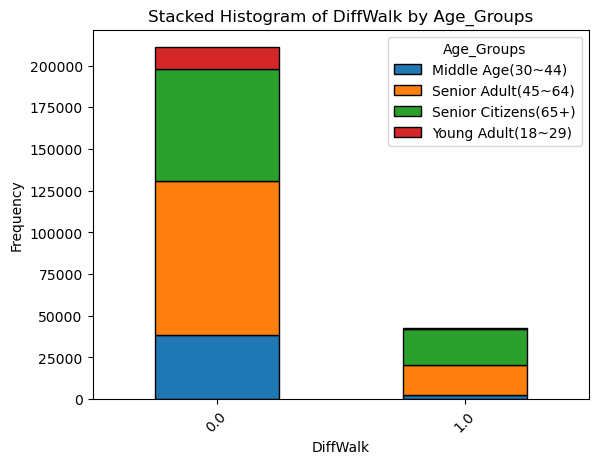

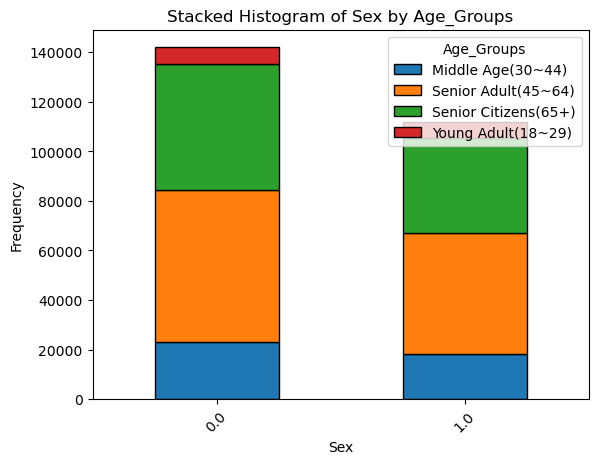

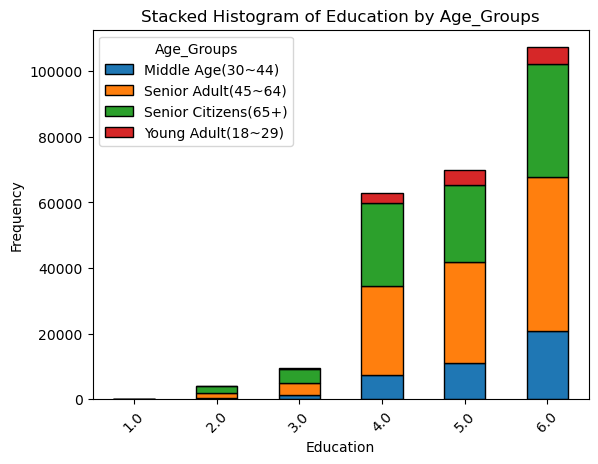

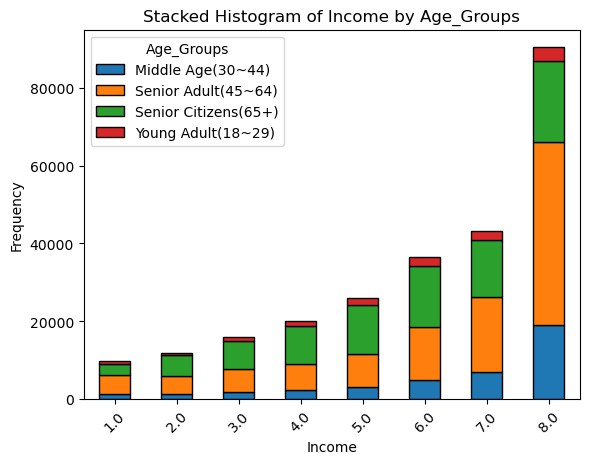

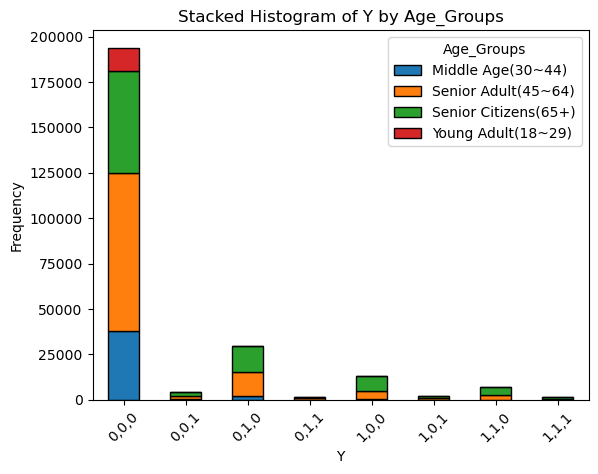

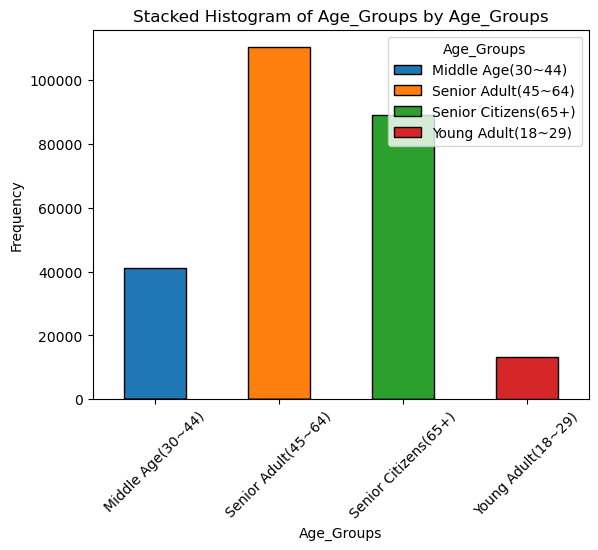

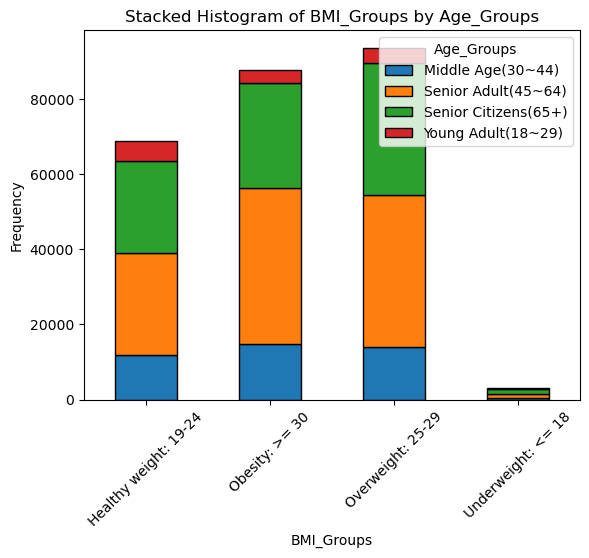

In [385]:
columns_to_drop_Hist = ['HeartDiseaseorAttack', 'Diabetes', 'Stroke', 'Age', 'Age_5Groups']
feature_names_Hist = df.drop(columns=columns_to_drop_Hist).columns
for name in feature_names_Hist:
    stacked_hist(df, name, 'Age_Groups')

# Mutual Information

### Function that calculates the mutual entropy given a column

In [364]:
##Entropy
def entropy(Y):
    if isinstance(Y, pd.Series):
        Y = Y.values

    # Handle object dtype appropriately
    if Y.dtype == object:
        # Convert array elements to string if they are not, ensures unique works correctly
        Y = np.array([str(y) for y in Y])
        
    unique, count = np.unique(Y, return_counts=True, axis=0)
    prob = count/len(Y)
    en = np.sum((-1)*prob*np.log(prob))
    return en

#Joint Entropy
def jEntropy(Y,X):
    YX = np.c_[Y,X]
    return entropy(YX)

#Conditional Entropy
def cEntropy(Y, X):
    return jEntropy(Y, X) - entropy(X)


#Information Gain
def get_mutual_information(df, Y_name, X_name, drop_Y000=False, merge_Ynot000=False):
    '''
    Calculates the mutual entropy given the name of the column
    @df:            dataframe
    @columnName:    name of the column that we want to calculate the mutual entropy for
    @drop_Y000:     drop the datapoints with Y = '0,0,0' 
    @merge_Ynot000: convert all the values in Y that is not '0,0,0' to '1,1,1'
    '''
    df_copy = df.copy()

    if drop_Y000:
        df_copy = df_copy[df_copy['Y'] != '0,0,0']

    if merge_Ynot000:
        df_copy.loc[df_copy['Y'] != '0,0,0', 'Y'] = '1,1,1'

    return entropy(df_copy[Y_name]) - cEntropy(df_copy[Y_name], df_copy[X_name])

In [365]:
get_mutual_information(df, 'Y', 'BMI')

0.03152370498739021

In [366]:
columns_to_drop = ['HeartDiseaseorAttack', 'Diabetes', 'Stroke', 'Y', 'Age', 'Age_5Groups']  

#### Function that draws the Mutual Information graph

In [367]:
import matplotlib.pyplot as plt

def draw_mutual_information(df, columns_to_drop, byGroup=None, targetColumn='Y', topFive=False):
    '''
    Draws the Mutual Information graph(s).
    @df:                    dataframe
    @columns_to_drop:       a list of columns that we don't want to be included in the graph
    @byGroup:               the name of the column to group the data by before calculating mutual information. 
                            Each unique value in this column will result in a separate graph. If None (default), 
                            a single graph for all features is produced.
    @topFive:               if True, only the top five features with the highest mutual information are displayed
    '''
    def plot_graph(features_with_entropy, title_suffix=''):
        sorted_features_with_entropy = sorted(features_with_entropy, key=lambda x: x[1], reverse=True)
        
        if topFive:
            sorted_features_with_entropy = sorted_features_with_entropy[:5]

        sorted_feature_names, sorted_entropy_values = zip(*sorted_features_with_entropy)

        plt.figure(figsize=(10, 6))
        plt.bar(range(len(sorted_entropy_values)), sorted_entropy_values, color='skyblue')
        plt.xlabel('Features')
        plt.ylabel('Mutual Information')
        plt.title(f'Mutual Information {title_suffix}')
        plt.xticks(range(len(sorted_entropy_values)), sorted_feature_names, rotation=45)
        plt.tight_layout()

        for i, entropy_value in enumerate(sorted_entropy_values):
            plt.text(i, entropy_value, round(entropy_value, 3), ha='center', va='bottom')

        plt.show()

    if not byGroup:
        feature_names = df.drop(columns=columns_to_drop).columns
        mutual_information_list = [get_mutual_information(df, columnName, targetColumn) for columnName in feature_names]
        features_with_entropy = list(zip(feature_names, mutual_information_list))
        plot_graph(features_with_entropy, 'Overall')
    
    else:
        value_names = sorted(df[byGroup].unique())
        for value in value_names:
            df_group = df[df[byGroup] == value]
            feature_names = df_group.drop(columns=columns_to_drop).columns
            mutual_information_list = [get_mutual_information(df_group, columnName, targetColumn) for columnName in feature_names]
            features_with_entropy = list(zip(feature_names, mutual_information_list))
            plot_graph(features_with_entropy, f'for {byGroup} = {value}')


### Mutual Information

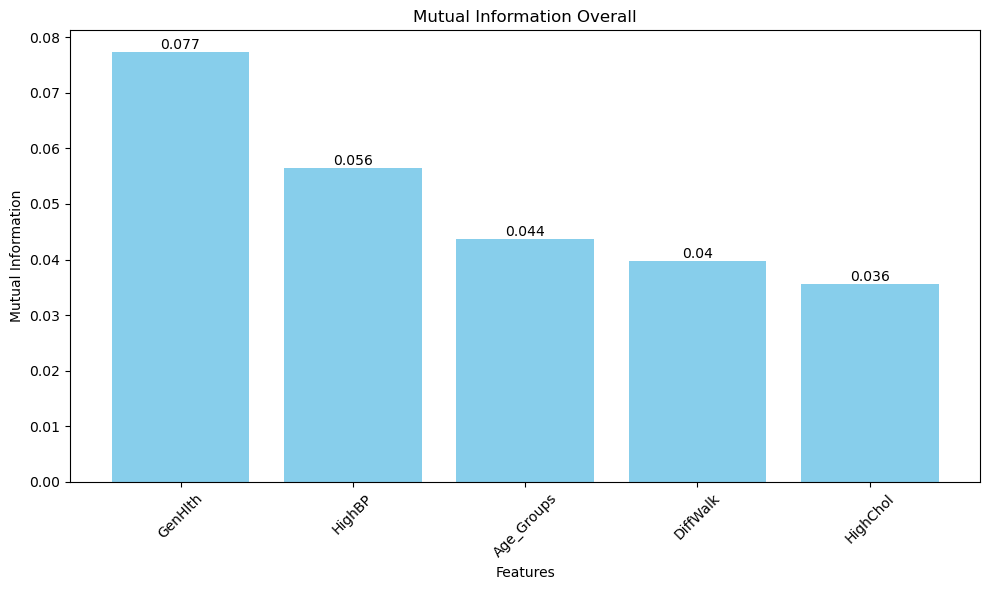

In [368]:
draw_mutual_information(df, columns_to_drop, topFive=True)

### Mutual Entropy from each Age group

In [383]:
columns_to_drop_MI = ['HeartDiseaseorAttack', 'Diabetes', 'Stroke', 'Age', 'Age_5Groups', 'Age_Groups', 'Y']
feature_names_MI = df.drop(columns=columns_to_drop_MI).columns

# feature_names_MI = feature_names_MI.tolist()
# feature_names_MI.remove('Y')

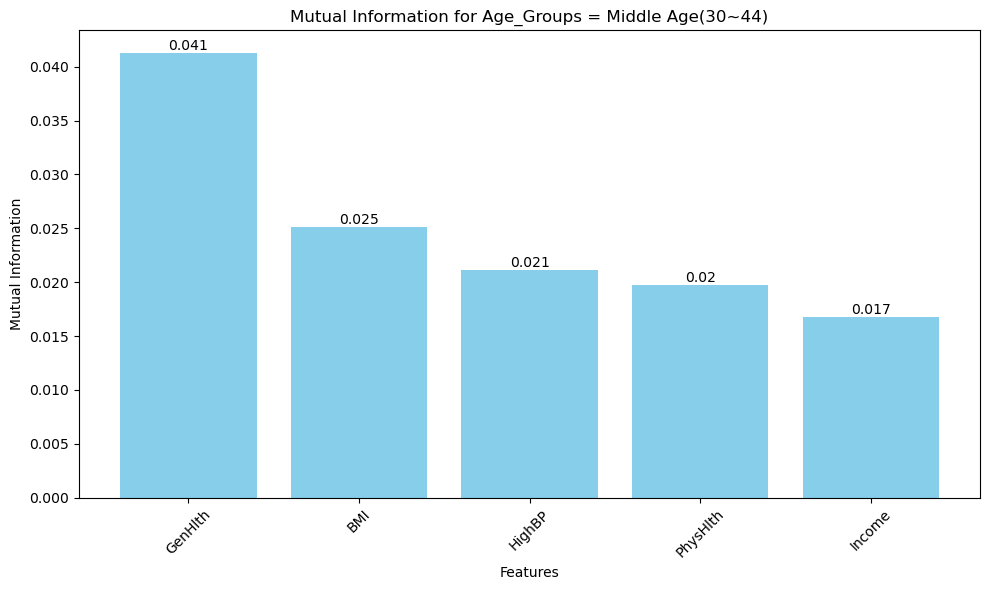

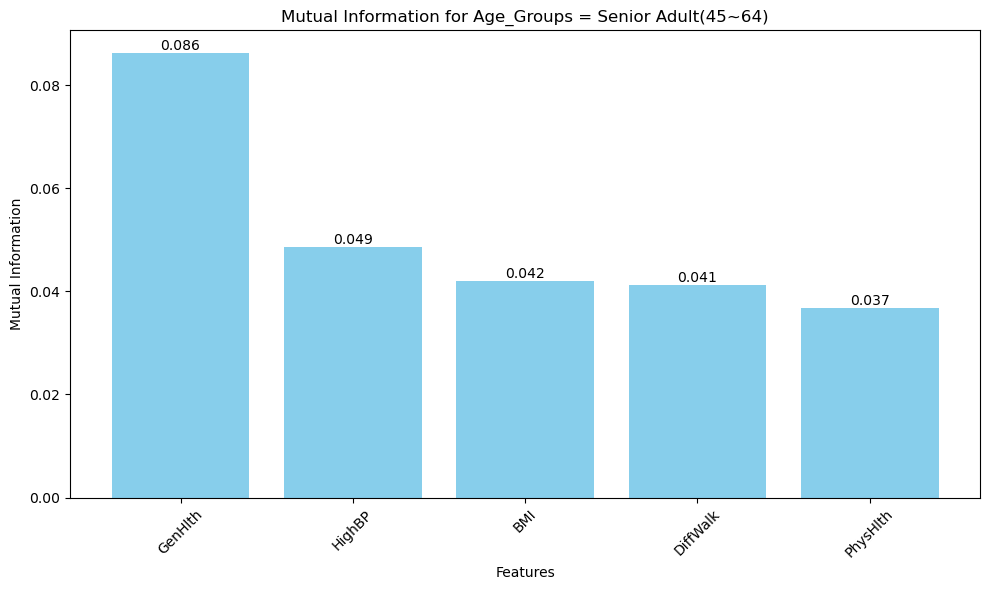

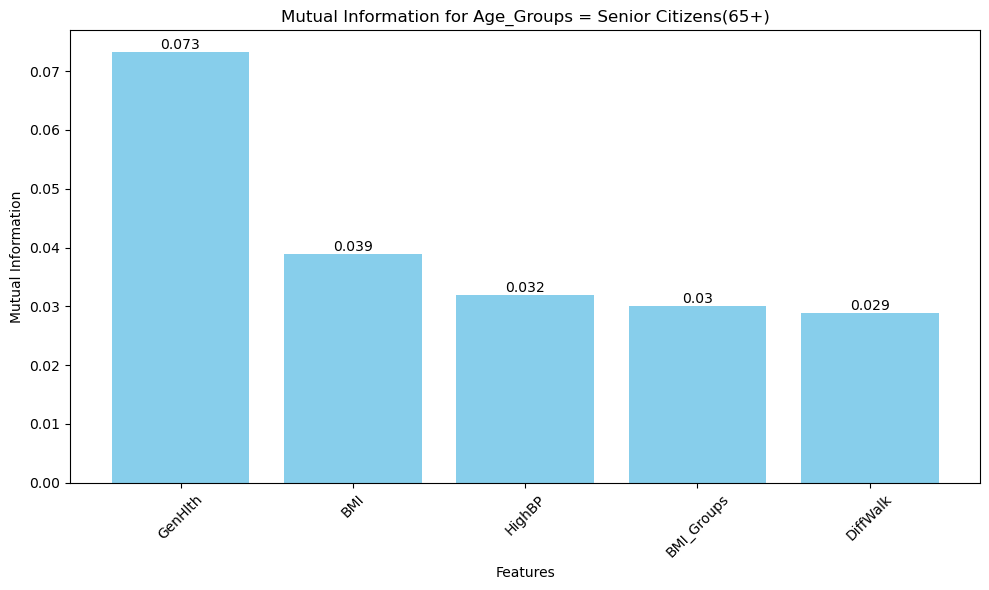

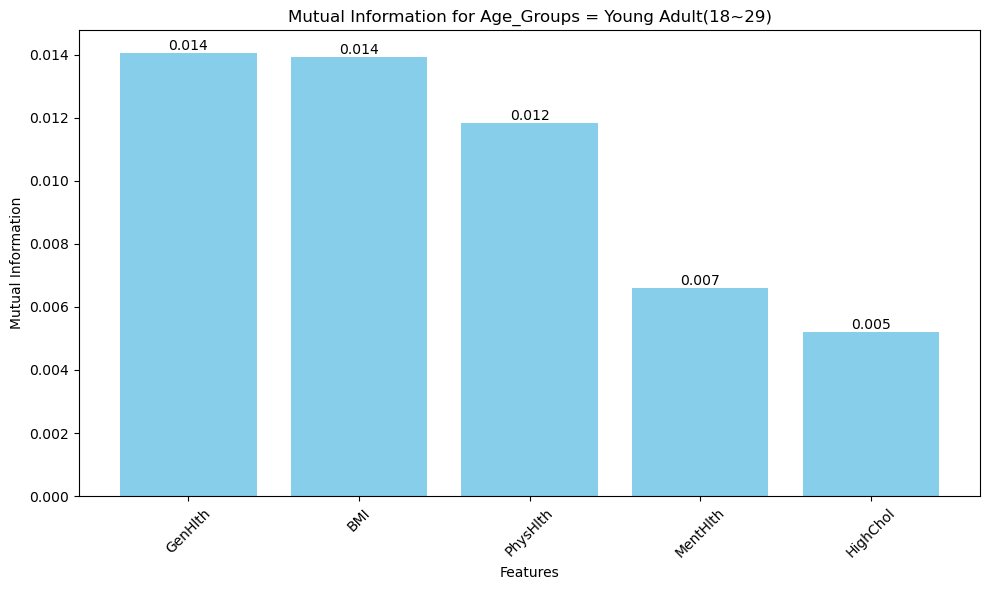

In [384]:
draw_mutual_information(df, columns_to_drop_MI, byGroup='Age_Groups', topFive=True)

can also change the third parameter to do the graph with df grouped by different feature

Note that the mutual entropy of DiffWalk from the following 2 graphs are 0 because in each df this feature has only 1 value (either '1' or '0')

we could append the DiffWalk to columns_to_drop to ignore this feature

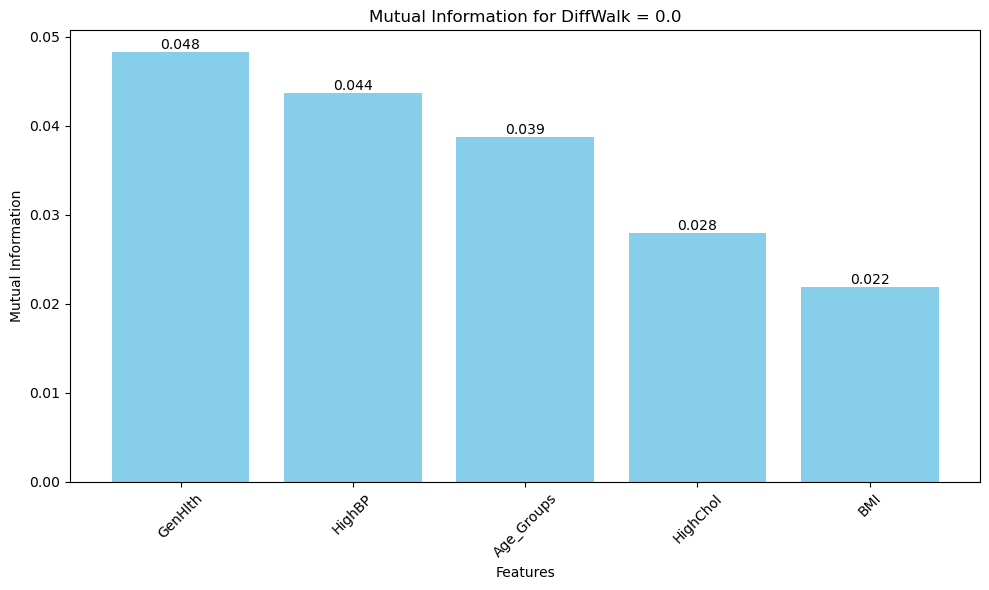

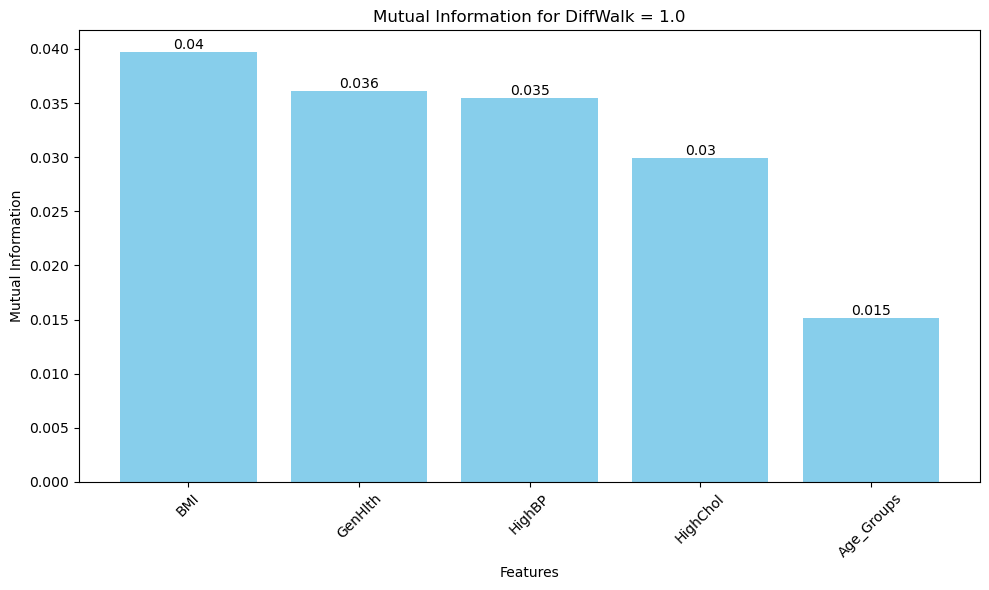

In [242]:
draw_mutual_information(df, columns_to_drop, 'DiffWalk', topFive=True)

The conditional entropy is used to find interaction effects.

Global view: If X=(X1,X2) as fused covariate variable, we need to compare whether 
- CE[Y]−CE[Y|X]>CE[Y]−CE[Y|X1]+CE[Y]−CE[Y|X2]

 to make sure whether the interacting effects are present.



### Define a function that merge two features

In [243]:
def merge_features(df, feature1, feature2):
    merged_series = df[feature1].astype(int).astype(str) + ',' + df[feature2].astype(int).astype(str)
    return merged_series

### Function that checks whether an interacting effect exist between 2 features

In [244]:
def check_interac_eff(df, feature1, feature2, cache_dic=None):
    '''
    Checks if there exists interaction effects between a pair of feature
    ------------------------------------------------------------------
    Parameters:
    @df:                panda dataframe
    @feature1:          name of feature (string)
    @feature2:          name of the another feature (string)
    @cache_dic:         dictonary that it uses to cache the calculated values to speed up
    '''
    if not cache_dic:
        cache_dic = {}
    merged_feature = merge_features(df, feature1, feature2)

    if 'CE_Y' not in cache_dic:
        cache_dic['CE_Y'] = entropy(df.Y)

    CE_Y_X = cEntropy(df.Y, merged_feature)

    if feature1 not in cache_dic:
        cache_dic[feature1] = cEntropy(df.Y, df[feature1])

    if feature2 not in cache_dic:
        cache_dic[feature2] = cEntropy(df.Y, df[feature2])

    CE_Y = cache_dic['CE_Y']
    CE_Y_X1 = cache_dic[feature1]
    CE_Y_X2 = cache_dic[feature2]
    difference = (CE_Y - CE_Y_X) - ((CE_Y - CE_Y_X1) + (CE_Y - CE_Y_X2))
    LHS = CE_Y - CE_Y_X
    RHS = (CE_Y - CE_Y_X1) + (CE_Y - CE_Y_X2)
    return [difference, LHS, RHS]


test the function

In [245]:
cache_dic1 = {}
result= check_interac_eff(df, 'DiffWalk', 'Sex')
if result[0] > 0:
    print(f"Interacting effects exist between DiffWalk and Sex")
else:
    print('no')


Interacting effects exist between DiffWalk and Sex


sounds wield tho

## Have to run this chunk of code to run the following codes

In [347]:
columns_to_drop = ['HeartDiseaseorAttack', 'Diabetes', 'Stroke', 'Age', 'Age_5Groups', 'Age_Groups']
feature_names = df.drop(columns=columns_to_drop).columns

feature_names = feature_names.tolist()
feature_names.remove('Y')

### Functions that construct the feature pairs with interaction effects by different Age Groups

In [247]:
def calculate_Interactions(df, feature_names):
    '''
    Helper function called by apply_interactions_by_group() below
    This function uses brute force to check all combinations pair
    to see if interaction effects exist
    ------------------------------------------------------------------
    Parameters:
    @df:                    panda dataframe
    @feature_names:         list of strings containing the name of the features
    ------------------------------------------------------------------
    return: a dictionary that contains the information about the existence of 
            interaction effects of each pair
    '''
    cache_dic = {}
    n = len(feature_names) 
    interactions_list = []
    for i in range(n):
        for j in range(i + 1, n):
            # print(f'Checking {feature_names[i]} & {feature_names[j]}')
            result = check_interac_eff(df, feature_names[i], feature_names[j], cache_dic)
            if result[0] > 0:
                interactions_list.append({'Feature1':feature_names[i],
                                        'Feature2':feature_names[j],
                                        'Interaction Effect':'Exist',
                                        'CE_Y - CE_Y_X':result[1],
                                        '(CE_Y - CE_Y_X1) + (CE_Y - CE_Y_X2)':result[2],
                                        'Difference':result[0]})
            else:
                interactions_list.append({'Feature1':feature_names[i],
                                        'Feature2':feature_names[j],
                                        'Interaction Effect':'Not Exist',
                                        'CE_Y - CE_Y_X':result[1],
                                        '(CE_Y - CE_Y_X1) + (CE_Y - CE_Y_X2)':result[2],
                                        'Difference':result[0]})
    return interactions_list


def apply_interactions_by_group(df, columns_to_drop):
    '''
    Constructs the dictionary that contains interaction effects of each pairs
    in different age group
    ------------------------------------------------------------------
    Parameters:
    @df:                    panda dataframe
    @columns_to_drop:       a list of strings containing the name of features that we want to drop
    ------------------------------------------------------------------
    return: a dictionary that contains interaction effects of each pairs
            in different age group
            @key: different values in column 'Age_Groups' from df
            @value: dictionary of interaction effects of each pairs in specified group
    '''
    grouped = df.groupby('Age_Groups')
    all_interactions = {}

    for name, group in grouped:
        feature_names = group.drop(columns=columns_to_drop).columns.tolist()
        interactions = calculate_Interactions(group, feature_names)
        all_interactions[name] = interactions

    return all_interactions

In [248]:
columns_to_drop = ['HeartDiseaseorAttack', 'Diabetes', 'Stroke', 'Age', 'Age_5Groups', 'Age_Groups', 'Y']
all_group_interactions = apply_interactions_by_group(df, columns_to_drop)

Store the pairs with interaction of all `age groups` to local machine

In [249]:
pd.DataFrame(all_group_interactions).to_csv('data/df_all_groups_interactions.csv', index=False)
df_interaction = pd.read_csv('data/df_all_groups_interactions.csv')

Print out the results

In [250]:
groups = pd.DataFrame(all_group_interactions).columns
for groupName in groups:
    print(f"Age Group: {groupName}")
    df_grouped = pd.DataFrame(all_group_interactions[groupName])
    filtered = df_grouped[df_grouped['Interaction Effect'] == 'Exist']
    top_five_diff = filtered.sort_values(by='Difference', ascending=False).head(5)
    top_five_diff = top_five_diff.drop(columns=(['CE_Y - CE_Y_X', '(CE_Y - CE_Y_X1) + (CE_Y - CE_Y_X2)']))
    print(top_five_diff)
    print()

Age Group: Middle Age(30~44)
     Feature1   Feature2 Interaction Effect  Difference
56        BMI   MentHlth              Exist    0.024039
57        BMI   PhysHlth              Exist    0.023220
61        BMI     Income              Exist    0.012620
138  MentHlth   PhysHlth              Exist    0.008475
60        BMI  Education              Exist    0.007094

Age Group: Senior Adult(45~64)
    Feature1   Feature2 Interaction Effect  Difference
56       BMI   MentHlth              Exist    0.018467
57       BMI   PhysHlth              Exist    0.016787
61       BMI     Income              Exist    0.004409
60       BMI  Education              Exist    0.002758
151      Sex     Income              Exist    0.002700

Age Group: Senior Citizens(65+)
     Feature1  Feature2 Interaction Effect  Difference
57        BMI  PhysHlth              Exist    0.022568
56        BMI  MentHlth              Exist    0.020625
61        BMI    Income              Exist    0.011017
138  MentHlth  PhysH

Repeat the same thing with the whole dataset

In [251]:
cache_dic = {}

n = len(feature_names)
interactions_list = []


for i in range(n):
    for j in range(i + 1, n):
        # print(f'Checking {feature_names[i]} & {feature_names[j]}')
        result = check_interac_eff(df, feature_names[i], feature_names[j], cache_dic)
        if result[0] > 0:
            interactions_list.append({'Feature1':feature_names[i],
                                      'Feature2':feature_names[j],
                                      'Interaction Effect':'Exist',
                                      'CE_Y - CE_Y_X':result[1],
                                      '(CE_Y - CE_Y_X1) + (CE_Y - CE_Y_X2)':result[2],
                                      'Difference':result[0]})
        else:
            interactions_list.append({'Feature1':feature_names[i],
                                      'Feature2':feature_names[j],
                                      'Interaction Effect':'Not Exist',
                                      'CE_Y - CE_Y_X':result[1],
                                      '(CE_Y - CE_Y_X1) + (CE_Y - CE_Y_X2)':result[2],
                                      'Difference':result[0]})

Store the pairs with interaction to local machine

In [262]:
pd.DataFrame(interactions_list).to_csv('data/df_interaction.csv', index=False)
interactions_list = pd.read_csv('data/df_interaction.csv')

In [ ]:
print(f"Age Group: {groupName}")
df_grouped = pd.DataFrame(all_group_interactions[groupName])
filtered = df_grouped[df_grouped['Interaction Effect'] == 'Exist']
top_five_diff = filtered.sort_values(by='Difference', ascending=False).head(5)
top_five_diff = top_five_diff.drop(columns=(['CE_Y - CE_Y_X', '(CE_Y - CE_Y_X1) + (CE_Y - CE_Y_X2)']))
print(top_five_diff)
print()

In [278]:
filtered = interactions_list[pd.DataFrame(interactions_list)['Interaction Effect'] == 'Exist']
top_five_diff = filtered.sort_values(by='Difference', ascending=False).head(5)
top_five_diff = top_five_diff.drop(columns=(['CE_Y - CE_Y_X', '(CE_Y - CE_Y_X1) + (CE_Y - CE_Y_X2)']))
top_five_diff

,Feature1,Feature2,Interaction Effect,Difference
56,BMI,MentHlth,Exist,0.010416
57,BMI,PhysHlth,Exist,0.008181
151,Sex,Income,Exist,0.004040
138,MentHlth,PhysHlth,Exist,0.002741
147,DiffWalk,Sex,Exist,0.002233


### Implement Contigency Table or something else below

# Contingency Table

In [73]:
def con_table(df, feature1, feature2='Y', prob=False, odd=False):
    contingency_table = pd.crosstab(df[feature1], df[feature2])
    print("Contingency Table:")
    display(contingency_table)

    if prob:
        print("\nProbability Table:")
        probability_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)
        
        display(probability_table)
    
    # if odd:
    #     if not prob:
    #         probability_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)
        
    #     # odd = P(A) / (1 - P(A))
    #     odds_table = probability_table.div(probability_table)
    #     print("\nOdds Table:")
    #     display(odds_table)


       

In [74]:
con_table(df, 'Sex', 'HighBP', prob=True, odd=True)

Contingency Table:


HighBP,0.0,1.0
Sex,,
0.0,84321,57653
1.0,60530,51176



Probability Table:


HighBP,0.0,1.0
Sex,,
0.0,0.593919,0.406081
1.0,0.541869,0.458131
